Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

## Balance Scale Weight & Distance Database

The correct way to find the class is the greater of (left-distance * left-weight) and (right-distance * right-weight).  If they are equal, it is balanced.
    
Class Name (Target variable):
L [balance scale tip to the left],
B [balance scale be balanced],
R [balance scale tip to the right]

Left-Weight: 5 (1, 2, 3, 4, 5)

Left-Distance: 5 (1, 2, 3, 4, 5)

Right-Weight: 5 (1, 2, 3, 4, 5)

Right-Distance: 5 (1, 2, 3, 4, 5)

In [1]:
import pandas as pd
import numpy as np

In [2]:
#for splitting

from sklearn.model_selection import train_test_split

In [3]:
#for decision tree classification

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [4]:
#for metrics in DT

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [5]:
balance_data = pd.read_csv("balance.csv")
balance_data.head()

,Target,LW,LD,RW,RD
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [6]:
balance_data.shape

(625, 5)

In [7]:
balance_data.dtypes

Target    object
LW         int64
LD         int64
RW         int64
RD         int64
dtype: object

In [8]:
balance_data['Target'].unique()

array(['B', 'R', 'L'], dtype=object)

In [9]:
balance_data.isnull().sum()

Target    0
LW        0
LD        0
RW        0
RD        0
dtype: int64

In [10]:
balance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Target  625 non-null    object
 1   LW      625 non-null    int64 
 2   LD      625 non-null    int64 
 3   RW      625 non-null    int64 
 4   RD      625 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [11]:
balance_data.describe()

,LW,LD,RW,RD
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [12]:
#separating target

features = balance_data.values[:,1:]
target = balance_data.values[:,0]

In [13]:
len(target)

625

In [14]:
target.shape

(625,)

In [15]:
features.shape

(625, 4)

In [16]:
# stratify will preserve the proportion of target as in original dataset, in the train and test datasets as well
# if y is categorical with values 0 and 1 and there are 25% of 0's and 75% of 1's
# stratify=y will make sure that your random split has 25% of 0's and 75% of 1's
# random_state = an integer, tts will return same results for each execution
# random_state = None, tts will return different results for each execution

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.7, stratify = target, random_state = 100)

In [17]:
# building model without any hyperparameter

clf_tree = DecisionTreeClassifier(random_state=100)
clf_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [18]:
# building model with Gini
# level will be till 3
# minimum number of samples required to be at a leaf node

# clf_gini = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state=100, max_depth=3)

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [19]:
# building model with Entropy

# clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state=100, min_samples_leaf=34)

clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=34, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [20]:
# make prediction

y_pred_tree = clf_tree.predict(X_test)
y_pred_gini = clf_gini.predict(X_test)
y_pred_entropy = clf_entropy.predict(X_test)

In [21]:
accuracy_score(y_pred_tree,y_test)*100

75.0

In [22]:
accuracy_score(y_pred_gini,y_test)*100

72.3404255319149

In [23]:
accuracy_score(y_pred_entropy,y_test)*100

70.74468085106383

In [24]:
confusion_matrix(y_test,y_pred_tree)

array([[ 1,  8,  6],
       [12, 72,  3],
       [12,  6, 68]], dtype=int64)

In [25]:
confusion_matrix(y_test,y_pred_gini)

array([[ 0,  8,  7],
       [ 0, 67, 20],
       [ 0, 17, 69]], dtype=int64)

In [26]:
confusion_matrix(y_test,y_pred_entropy)

array([[ 0,  6,  9],
       [ 0, 65, 22],
       [ 0, 18, 68]], dtype=int64)

In [27]:
classification_report(y_test,y_pred_tree)

'              precision    recall  f1-score   support\n\n           B       0.04      0.07      0.05        15\n           L       0.84      0.83      0.83        87\n           R       0.88      0.79      0.83        86\n\n    accuracy                           0.75       188\n   macro avg       0.59      0.56      0.57       188\nweighted avg       0.79      0.75      0.77       188\n'

In [28]:
classification_report(y_test,y_pred_gini)

C:\Users\USER\dsprojects\env\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           B       0.00      0.00      0.00        15\n           L       0.73      0.77      0.75        87\n           R       0.72      0.80      0.76        86\n\n    accuracy                           0.72       188\n   macro avg       0.48      0.52      0.50       188\nweighted avg       0.67      0.72      0.69       188\n'

In [29]:
classification_report(y_test,y_pred_entropy)

'              precision    recall  f1-score   support\n\n           B       0.00      0.00      0.00        15\n           L       0.73      0.75      0.74        87\n           R       0.69      0.79      0.74        86\n\n    accuracy                           0.71       188\n   macro avg       0.47      0.51      0.49       188\nweighted avg       0.65      0.71      0.68       188\n'

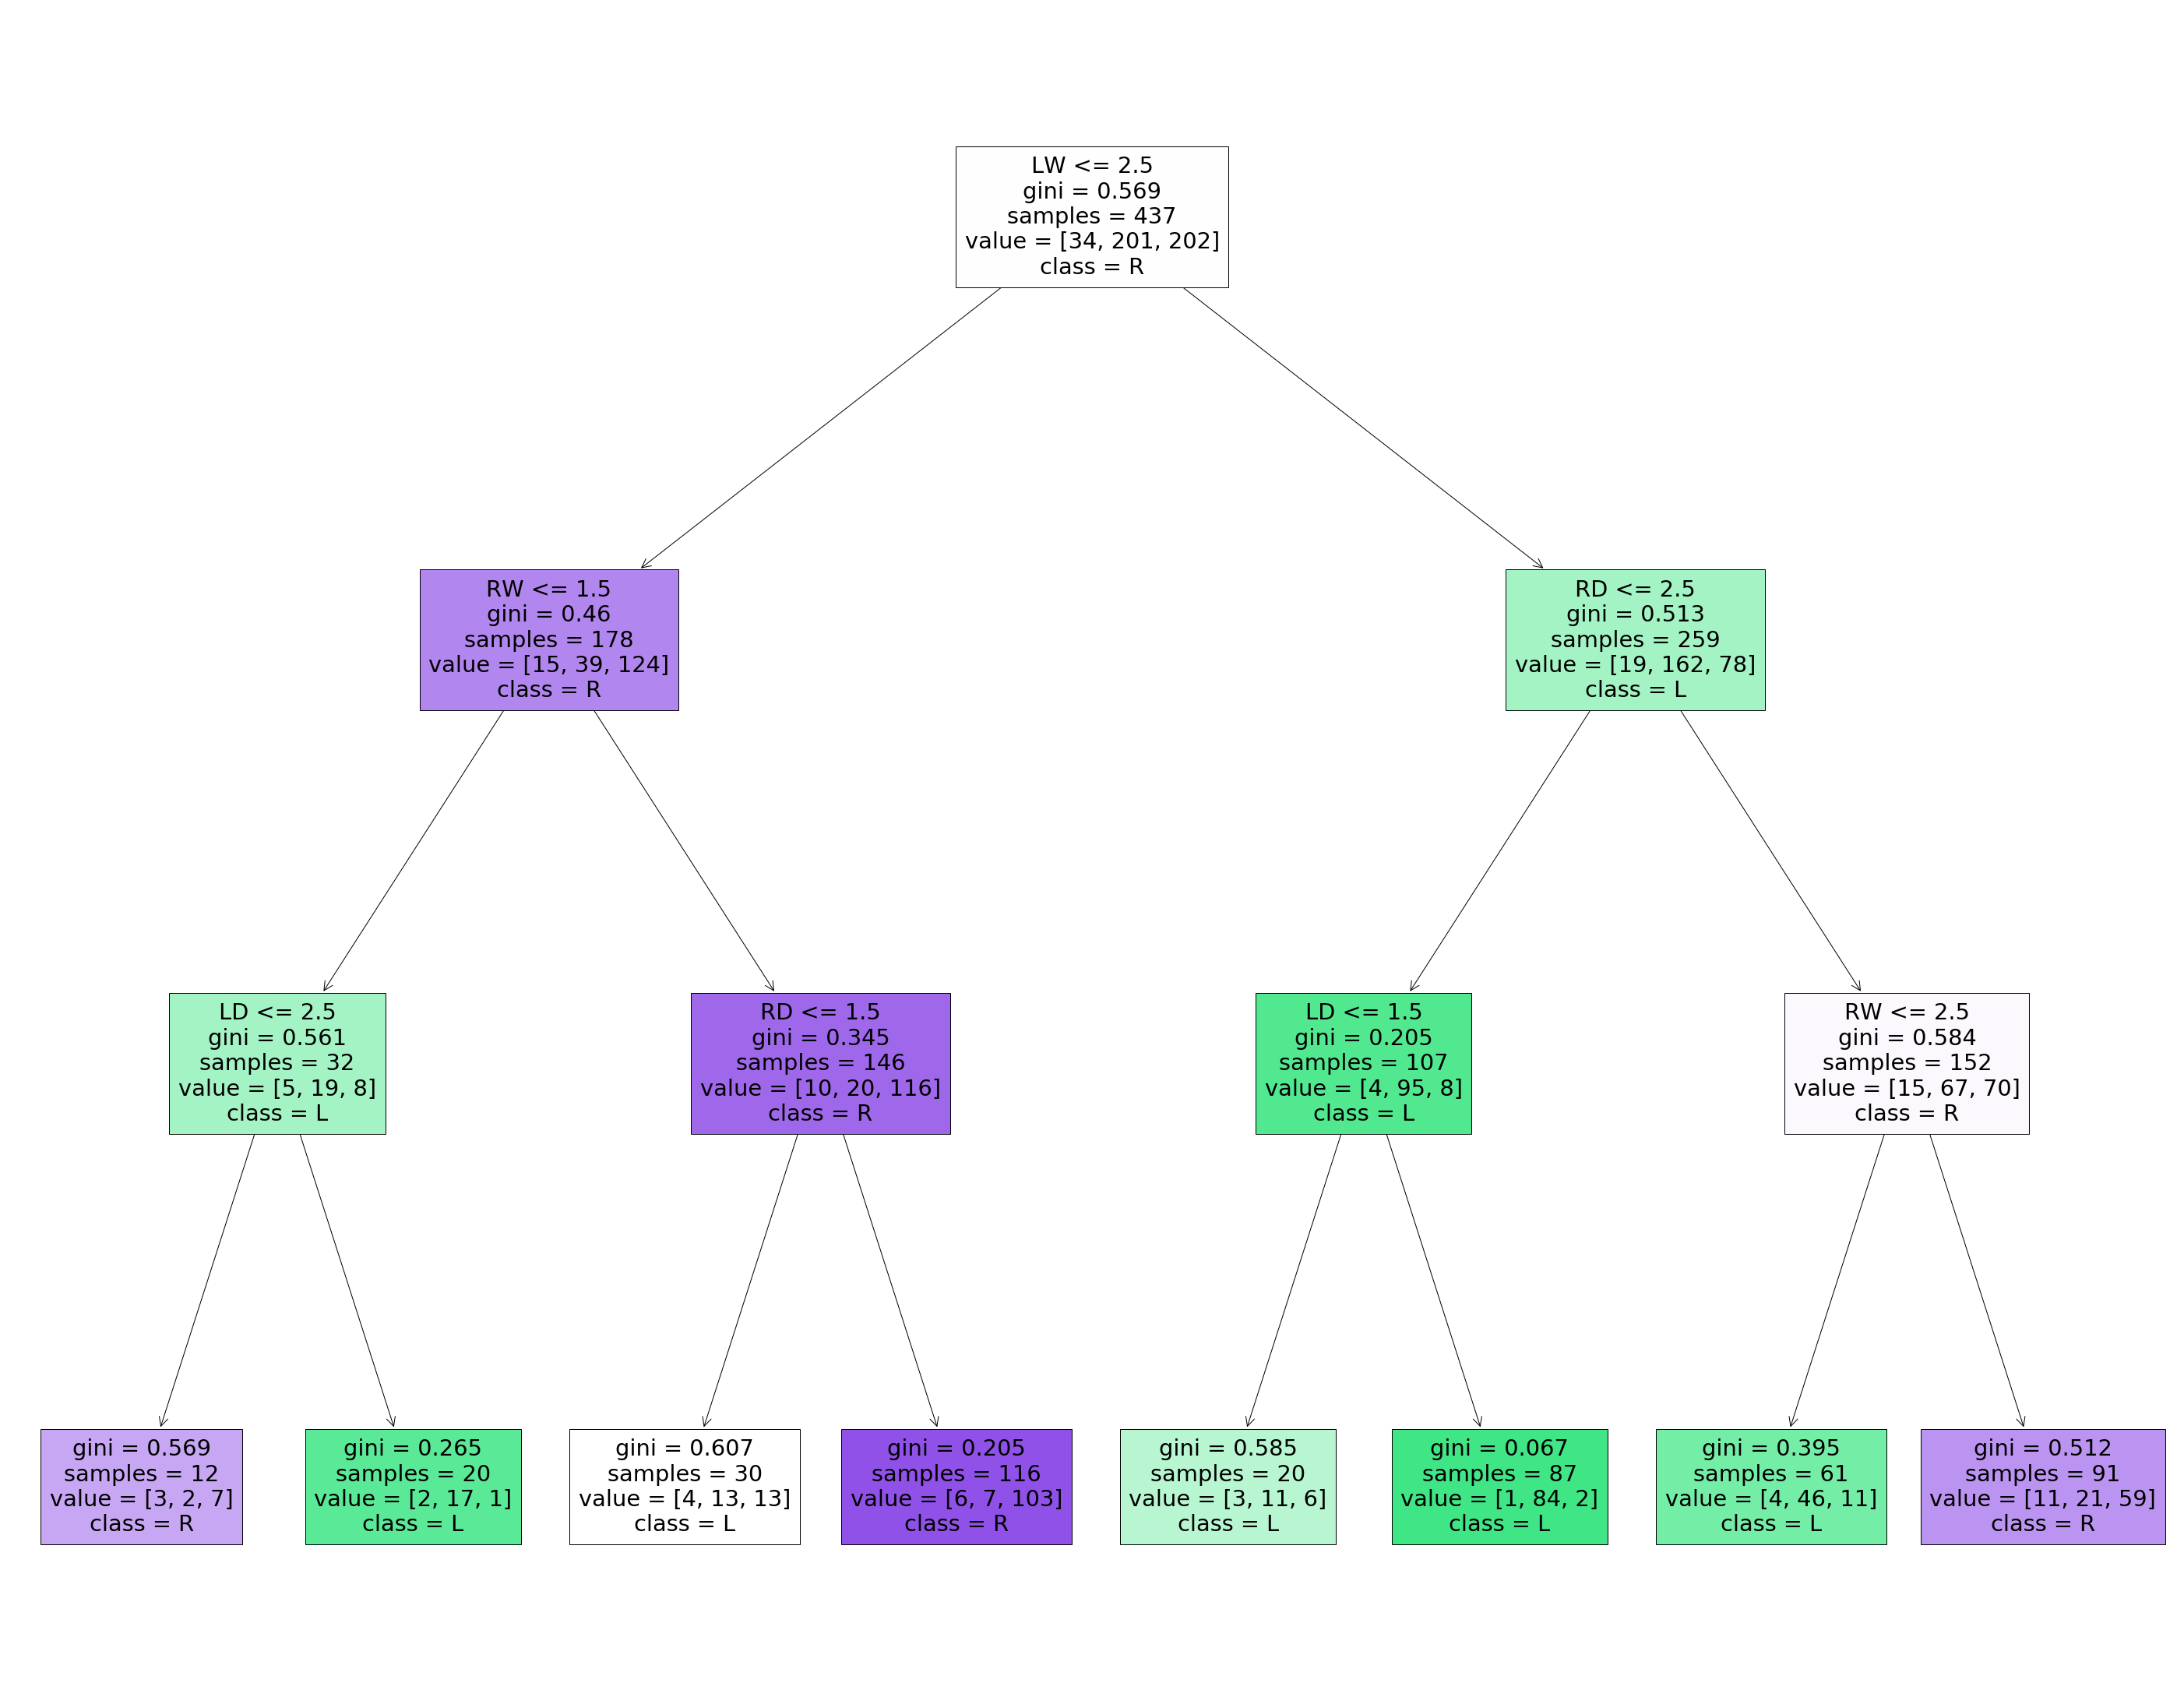

In [30]:
# visualization for gini

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(50,40))
ss = tree.plot_tree(clf_gini, feature_names=['LW','LD','RW','RD'], class_names = ['B','L','R'], filled=True)

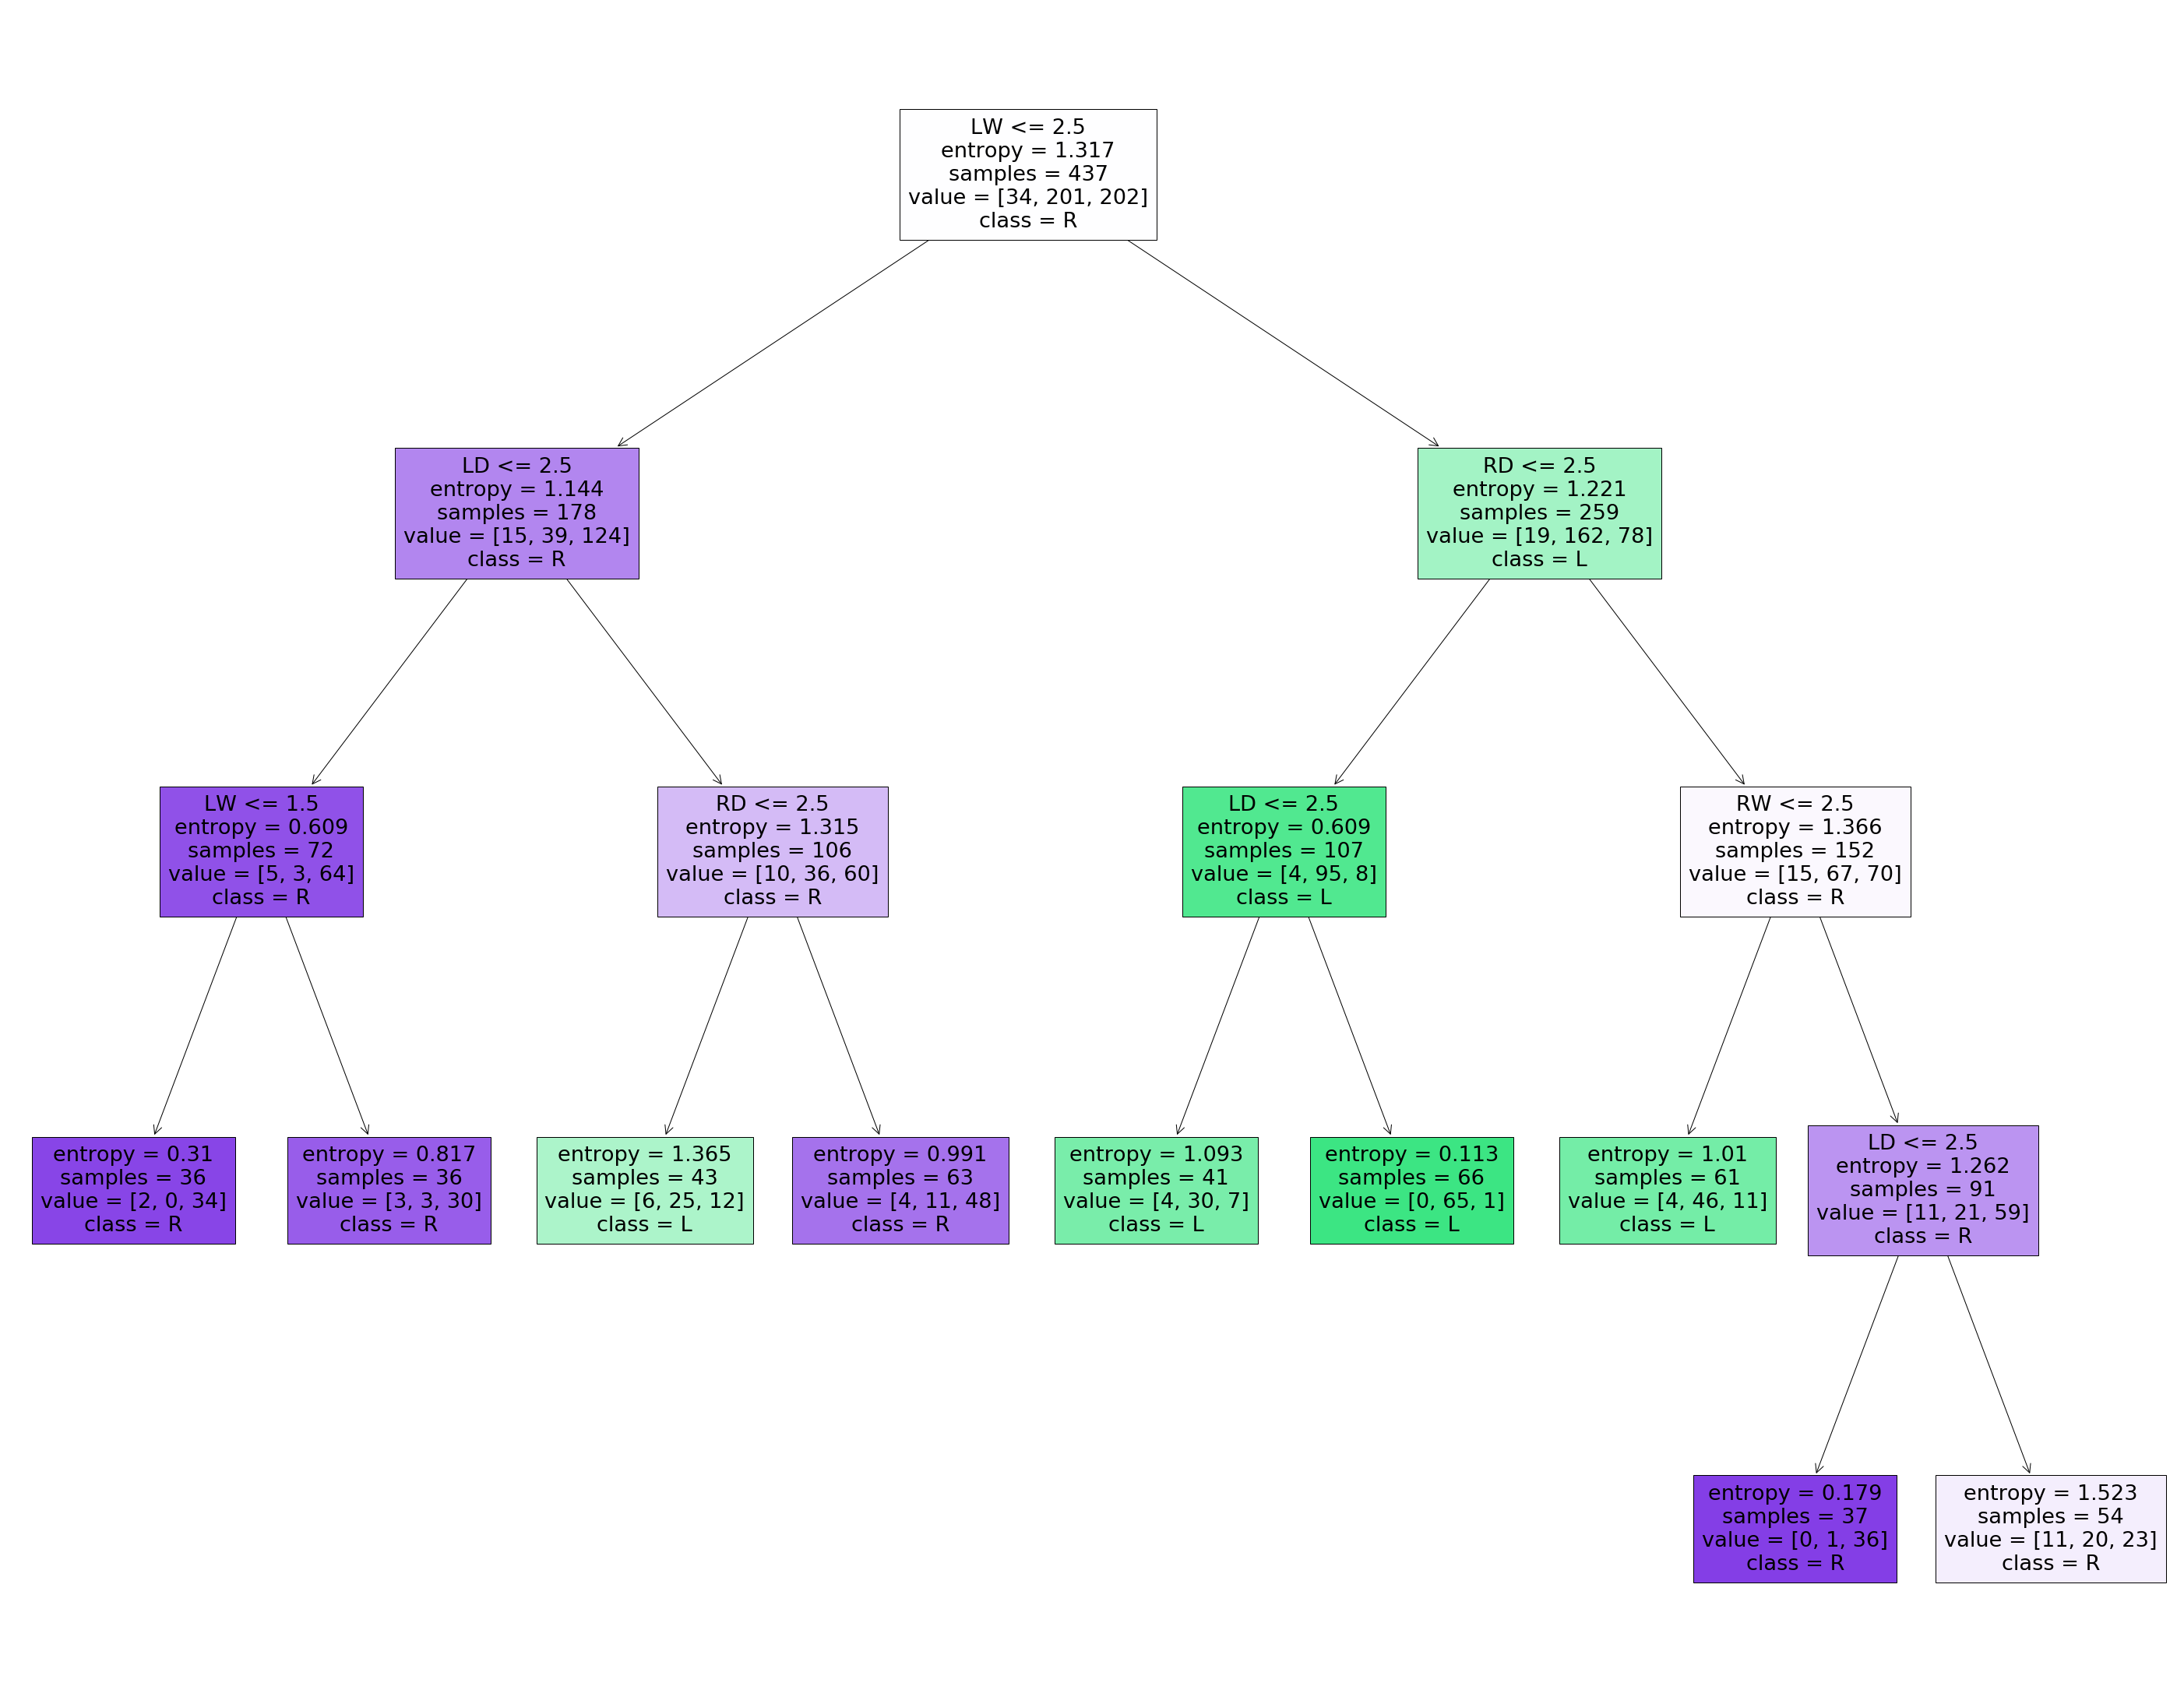

In [31]:
# visualization for entropy
# min sample size given 34, so all samples > 34

import matplotlib.pyplot as plt

fig=plt.figure(figsize=(50,40))
ss = tree.plot_tree(clf_entropy, feature_names=['LW','LD','RW','RD'], class_names = ['B','L','R'], filled=True)

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {'criterion':['gini','entropy'],'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4,5]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42),params,verbose=1,cv=5)
grid_search_cv.fit(features,target)

Fitting 5 folds for each of 784 candidates, totalling 3920 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3920 out of 3920 | elapsed:    8.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [33]:
grid_search_cv.best_estimator_

#these are the parameters that gives us best decision tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [35]:
clf_gini1 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=22,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
clf_gini1.fit(X_train,y_train)

y_pred_gini1 = clf_gini1.predict(X_test)

accuracy_score(y_pred_gini1,y_test)*100

75.53191489361703